In [1]:
import matplotlib.pyplot as plt
import numpy as np
from muca.model.p_body_ising import PBodyTwoDimIsing
from muca.algorithm.wang_landau import WangLandau
from muca.algorithm.parameters import WangLandauParameters
from muca.results.analysis import Analyzer

In [2]:
p = 3
L = 9
S = 2
num_trials = 5

In [3]:
result_metropolis_on = []
for _ in range(num_trials):
    result_metropolis_on.append(
        WangLandau.run(
            model=PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S),
            parameters=WangLandauParameters(
                modification_criterion=1e-08,
                convergence_check_interval=100,
                num_divided_energy_range=1,
                overlap_rate = 0.4,
                flatness_criterion = 0.9,
                update_method="METROPOLIS",
            ),
            num_threads=1,
            calculate_order_parameters=True,
            backend = "cpp"
        )
    )

Running Wang-Landau simulation by cpp ...
Done simulation (360.4) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (219.6) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (270.1) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (205.2) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (417.5) [sec] by cpp


In [4]:
result_metropolis_off = []
for _ in range(num_trials):
    result_metropolis_off.append(
        WangLandau.run(
            model=PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S),
            parameters=WangLandauParameters(
                modification_criterion=1e-08,
                convergence_check_interval=100,
                num_divided_energy_range=1,
                overlap_rate = 0.4,
                flatness_criterion = 0.9,
                update_method="METROPOLIS",
            ),
            num_threads=1,
            calculate_order_parameters=False,
            backend = "cpp"
        )
    )

Running Wang-Landau simulation by cpp ...
Done simulation (85.1) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (143.1) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (106.6) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (111.1) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (89.1) [sec] by cpp


In [5]:
result_heat_on = []
for _ in range(num_trials):
    result_heat_on.append(
        WangLandau.run(
            model=PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S),
            parameters=WangLandauParameters(
                modification_criterion=1e-08,
                convergence_check_interval=100,
                num_divided_energy_range=1,
                overlap_rate = 0.4,
                flatness_criterion = 0.9,
                update_method="HEAT_BATH",
            ),
            num_threads=1,
            calculate_order_parameters=True,
            backend = "cpp"
        )
    )

Running Wang-Landau simulation by cpp ...
Done simulation (165.9) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (176.9) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (152.0) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (236.9) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (260.9) [sec] by cpp


In [6]:
result_heat_off = []
for _ in range(num_trials):
    result_heat_off.append(
        WangLandau.run(
            model=PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S),
            parameters=WangLandauParameters(
                modification_criterion=1e-08,
                convergence_check_interval=100,
                num_divided_energy_range=1,
                overlap_rate = 0.4,
                flatness_criterion = 0.9,
                update_method="HEAT_BATH",
            ),
            num_threads=1,
            calculate_order_parameters=False,
            backend = "cpp"
        )
    )

Running Wang-Landau simulation by cpp ...
Done simulation (143.6) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (114.7) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (150.6) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (115.0) [sec] by cpp
Running Wang-Landau simulation by cpp ...
Done simulation (120.1) [sec] by cpp


Text(0, 0.5, 'Time [s]')

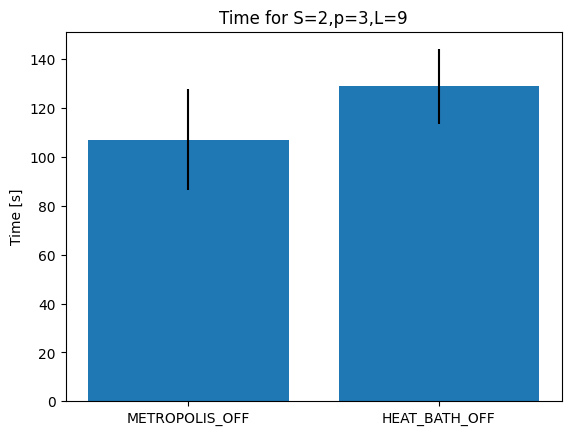

In [7]:
plt.title(f"Time for S={S},p={p},L={L}")
plt.bar(
    [
    #    "METROPOLIS_ON", 
    #    "HEAT_BATH_ON", 
        "METROPOLIS_OFF", 
        "HEAT_BATH_OFF"
    ],
    [
    #    np.mean([r.info["total_time"] for r in result_metropolis_on]), 
    #    np.mean([r.info["total_time"] for r in result_heat_on]),
        np.mean([r.info["total_time"] for r in result_metropolis_off]),
        np.mean([r.info["total_time"] for r in result_heat_off])
    ],
    yerr=[
    #    np.std([r.info["total_time"] for r in result_metropolis_on]), 
    #    np.std([r.info["total_time"] for r in result_heat_on]),
        np.std([r.info["total_time"] for r in result_metropolis_off]),
        np.std([r.info["total_time"] for r in result_heat_off])
    ]
)
plt.ylabel("Time [s]")

Text(0, 0.5, 'Sweeps')

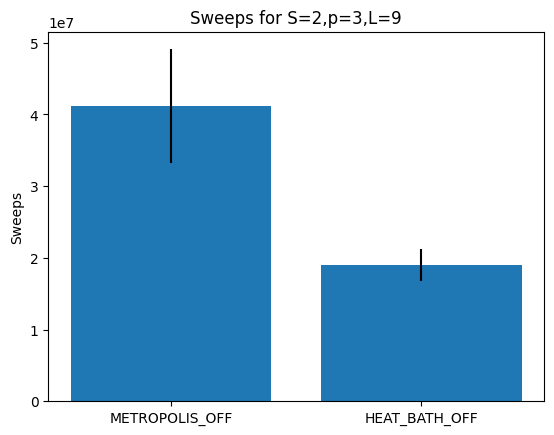

In [8]:
plt.title(f"Sweeps for S={S},p={p},L={L}")
plt.bar(
    [
    #    "METROPOLIS_ON", 
    #    "HEAT_BATH_ON", 
        "METROPOLIS_OFF", 
        "HEAT_BATH_OFF"
    ],
    [
    #    np.mean([r.total_sweeps for r in result_metropolis_on]), 
    #    np.mean([r.total_sweeps for r in result_heat_on]),
        np.mean([r.total_sweeps for r in result_metropolis_off]),
        np.mean([r.total_sweeps for r in result_heat_off])
    ],
    yerr=[
    #    np.std([r.total_sweeps for r in result_metropolis_on]), 
    #    np.std([r.total_sweeps for r in result_heat_on]),
        np.std([r.total_sweeps for r in result_metropolis_off]),
        np.std([r.total_sweeps for r in result_heat_off])
    ]
)
plt.ylabel("Sweeps")